# **Ant colony optimization:**

ACO can be used to solve a wide range of optimization problems, such as the traveling salesman problem, where the goal is to find the shortest path that visits a set of cities.

**SOLVING TRAVELING SALESMAN PROBLEM:**

The Traveling Salesman Problem (TSP) is a famous mathematical problem in computer science. In this problem, a salesman needs to visit a set of cities exactly once and return to the original city. The task is to find the shortest possible route that the salesman can take to visit all the cities and return to the starting city.

1- **Import the needed libraries**


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2- **Define distance method**

It takes two points and return the distance between them

In [7]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

3- **Define ant colony optimization method**

*Parameters*: the points, number of ants, number of iterations, alpha, beta, evaporate rate, Q

*Return values*: best path, best path length

Steps involved in Ant colony optimization:

• Initialization: We start by placing the ants on the starting point.

• Movement: Each ant selects a point to move to based on a probabilistic function that takes into account the pheromone level and the heuristic information. The heuristic information can be thought of as a measure of how good a particular point is.

• Updating pheromone trails: The pheromone trail on each edge is updated based on the quality of the solution found by the ant that traversed that edge.

• Termination: We stop the algorithm after a certain number of iterations or when a satisfactory solution is found.
By repeating these steps, the ants will gradually converge on the best solution to the problem.

In [8]:
def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf

    for iteration in range(n_iterations):
        #print("\niteration", iteration)
        paths = []
        path_lengths = []

        for ant in range(n_ants):
            #print("ant", ant)
            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0

            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                #print("unvisited", unvisited)
                probabilities = np.zeros(len(unvisited))

                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / distance(points[current_point], points[unvisited_point])**beta

                probabilities /= np.sum(probabilities)

                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point
            paths.append(path)
            path_lengths.append(path_length)

            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length
                print("best_path",best_path,"path_length", path_length)

        pheromone *= evaporation_rate

        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):
                pheromone[path[i], path[i+1]] += Q/path_length
            pheromone[path[-1], path[0]] += Q/path_length

    return best_path, best_path_length

4- **Finding the best path**

First generate 10 random 3D points, then send them to the ant_colony_optimization method and finally print the returned values, which are best_path and best_path_length

In [9]:
# Example usage:
points = np.random.rand(10, 3) # Generate 10 random 3D points
#ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)
best_path, best_path_length = ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)
n_points = len(points)
print("best_path", best_path, "best_path_length", best_path_length)

best_path [2, 4, 0, 3, 7, 8, 1, 9, 6, 5] path_length 5.62248624306934
best_path [1, 4, 3, 9, 6, 0, 2, 7, 8, 5] path_length 4.677015194846641
best_path [5, 6, 4, 1, 9, 0, 2, 8, 3, 7] path_length 4.400450583586153
best_path [2, 7, 8, 5, 3, 1, 4, 9, 6, 0] path_length 4.2141411291134965
best_path [5, 3, 8, 2, 7, 6, 9, 1, 4, 0] path_length 3.9850949864324052
best_path [9, 4, 1, 6, 0, 2, 7, 8, 3, 5] path_length 3.8767430175562803
best_path [2, 7, 8, 3, 5, 4, 1, 0, 6, 9] path_length 3.873523020946336
best_path [5, 2, 7, 8, 3, 6, 9, 4, 1, 0] path_length 3.8257789324712608
best_path [6, 9, 4, 1, 0, 2, 7, 8, 3, 5] path_length 3.604605212066377
best_path [5, 3, 8, 7, 2, 0, 1, 4, 9, 6] path_length 3.6046052120663763
best_path [5, 3, 8, 7, 2, 0, 1, 4, 9, 6] best_path_length 3.6046052120663763


5- **Plot the 3D figure**


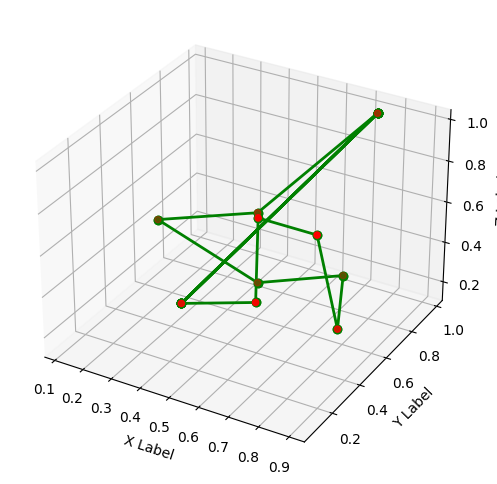

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')

for i in range(n_points-1):
     ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
     [points[best_path[i],1], points[best_path[i+1],1]],
     [points[best_path[i],2], points[best_path[i+1],2]],
     c='g', linestyle='-', linewidth=2, marker='o')

     ax.plot([points[best_path[0],0], points[best_path[-1],0]],
     [points[best_path[0],1], points[best_path[-1],1]],
     [points[best_path[0],2], points[best_path[-1],2]],
     c='g', linestyle='-', linewidth=2, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()